In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from platform import python_version
python_version()

'3.10.0'

In [3]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib.colors import ListedColormap

In [4]:
guid_id_vals = [11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 31, 32, 33, 34, 35, 36]
guid_id_colors = ["#ff0000", "#00d30e", "#0000ff", "#ffae00", "#cd00cd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", "#c49c94", "#f7b6d2", "#c7c7c7"]

# Create a ListedColormap using the defined colors
guid_id_cmap = ListedColormap(guid_id_colors)

guid_id_cdict = dict(map(lambda v,c : (v,c) , guid_id_vals, guid_id_colors))

print(guid_id_cdict)

{11: '#ff0000', 12: '#00d30e', 13: '#0000ff', 14: '#ffae00', 15: '#cd00cd', 20: '#8c564b', 21: '#e377c2', 22: '#7f7f7f', 23: '#bcbd22', 24: '#17becf', 25: '#aec7e8', 26: '#ffbb78', 31: '#98df8a', 32: '#ff9896', 33: '#c5b0d5', 34: '#c49c94', 35: '#f7b6d2', 36: '#c7c7c7'}


In [5]:
data = pd.read_csv('ops3_log_vandenberg.csv')


data['time'] = data['loop_dt'].cumsum()

data.head()

entry_data = data[data['guid_id'] < 20]
taem_data = data[data['guid_id'] >= 20]
a_l_data = data[data['guid_id'] >= 30]


,guid_id,loop_dt,rwy_alt,vel,surfv,mach,hdot,lat,long,range,...,nz,drag,eow,prog_pch,prog_roll,prog_yaw,flap_defl,spdbk_defl,Unnamed: 19,time
0,11,0.56,120500.500186,7828.653169,7828.653169,20.485312,-129.876884,63.121195,0.227766,7947.622721,...,-0.000044,0.027335,1.097989e+07,-14.063134,3.882072,-27.127767,0.0,0.0,NaN,0.56
1,11,0.58,120425.052227,7828.727963,7828.727963,20.508383,-129.909448,63.153837,0.173908,7943.185581,...,-0.000141,0.026454,1.097982e+07,-9.630078,4.358518,-21.994696,0.0,0.0,NaN,1.14
2,11,0.58,120349.550337,7828.779727,7828.779727,20.531508,-129.936578,63.185336,0.119933,7938.748455,...,-0.000035,0.025347,1.097968e+07,-4.126787,4.259037,-16.025295,0.0,0.0,NaN,1.72
3,11,0.60,120271.388728,7828.793574,7828.793574,20.554652,-129.959013,63.217942,0.067707,7934.158340,...,-0.000010,0.026498,1.097944e+07,2.414301,3.388342,-9.924079,0.0,0.0,NaN,2.32
4,11,0.56,120198.377541,7828.811186,7828.811186,20.577123,-129.999542,63.249407,0.015372,7929.874235,...,0.000015,0.026977,1.097923e+07,9.777751,1.734775,-4.559561,0.0,0.0,NaN,2.88


In [6]:
def angle360(angle):
    out = angle

    while (out >= 360):
        out -= 360
    while (out < 0):
        out += 360
    return out

def angle180(angle):
    out = angle

    while (out >= 180):
        out -= 360
    while (out < -180):
        out += 360
    return out

Text(0.5, 1.0, 'Trajectory on 2D Earth Map (Cartopy)')

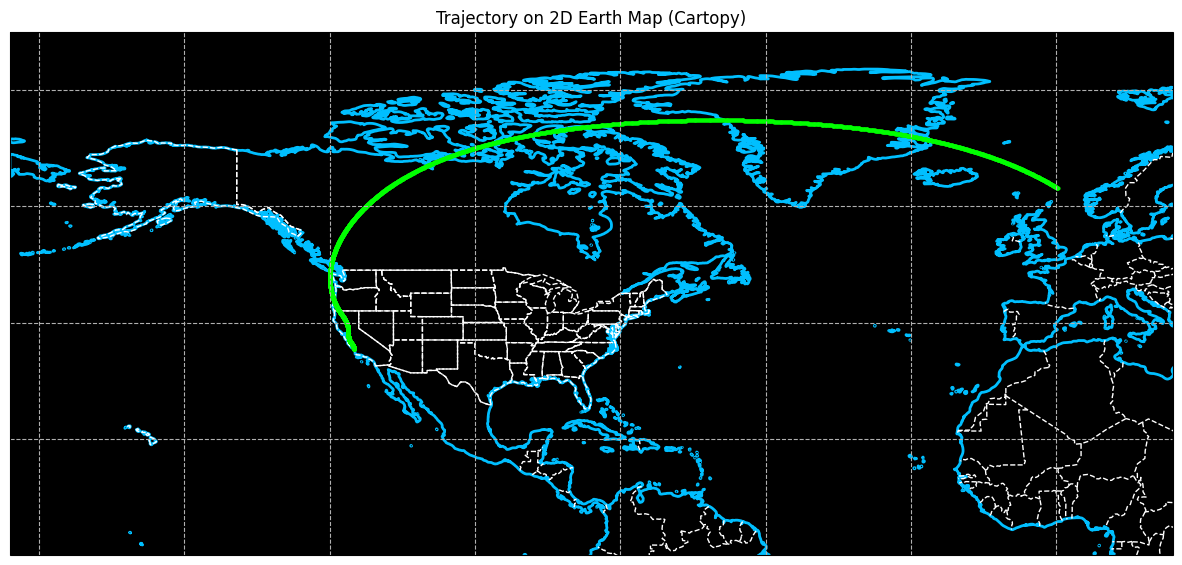

Text(0.5, 1.0, 'Trajectory on 2D Earth Map (Cartopy)')

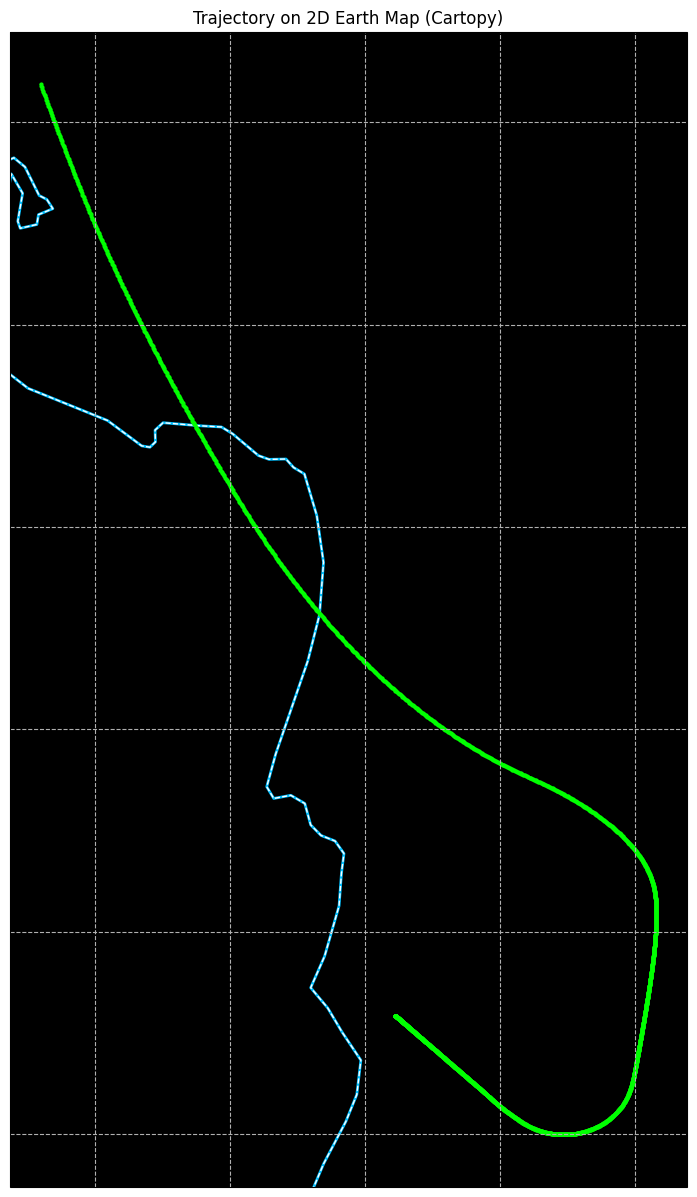

In [19]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.plot(entry_data['long'], entry_data['lat'], marker='o', linestyle='-', color='#00ff00', markersize=2, transform=ccrs.PlateCarree())

ax.set_extent([-180, 20, 0, 90], crs=ccrs.PlateCarree())
ax.set_facecolor('k')
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='#00bfff',
                                        facecolor='black',
                                           linewidth=2))
ax.add_feature(cfeature.BORDERS, linestyle='--', edgecolor='white')
ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='white')

# Add coastlines and gridlines
ax.gridlines(linestyle='--')

# Add title
plt.title('Trajectory on 2D Earth Map (Cartopy)')

# Show the plot
plt.show()



fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.plot(taem_data['long'], taem_data['lat'], marker='o', linestyle='-', color='#00ff00', markersize=2, transform=ccrs.PlateCarree())

ax.set_facecolor('k')
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='#00bfff',
                                        facecolor='black',
                                           linewidth=2))
ax.add_feature(cfeature.BORDERS, linestyle='--', edgecolor='white')
ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='white')


# Add coastlines and gridlines
ax.gridlines(linestyle='--')

# Add title
plt.title('Trajectory on 2D Earth Map (Cartopy)')

# Show the plot
plt.show()

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Altitude (km)')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Speed (m/s)')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Range (km)')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'delaz')

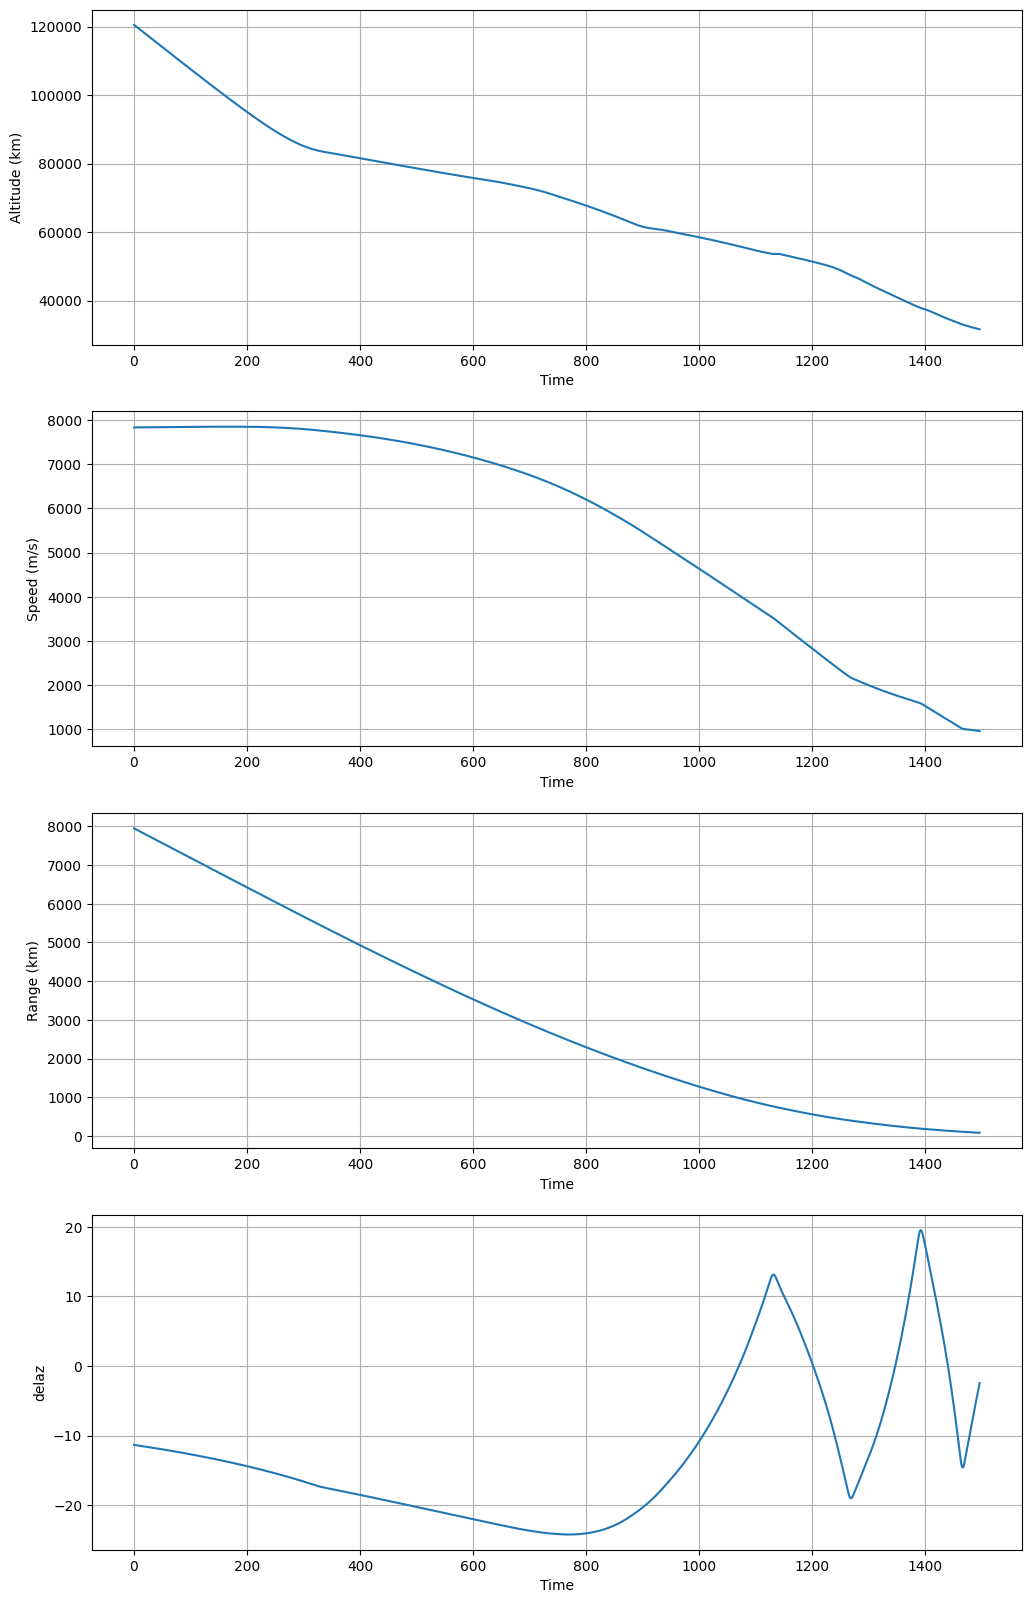

In [8]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 5 * 4))

plt_ = ax[0]
plt1 = plt_.plot(entry_data['time'], entry_data['rwy_alt'])
    

plt_.set_xlabel('Time')
plt_.set_ylabel('Altitude (km)')
plt_.grid()
  


plt_ = ax[1]
plt1 = plt_.plot(entry_data['time'], entry_data['surfv'])
    
plt_.set_xlabel('Time')
plt_.set_ylabel('Speed (m/s)')
plt_.grid()

plt_ = ax[2]
plt1 = plt_.plot(entry_data['time'], entry_data['range'])
    
plt_.set_xlabel('Time')
plt_.set_ylabel('Range (km)')
plt_.grid()


plt_ = ax[3]
plt1 = plt_.plot(entry_data['time'], entry_data['delaz'])
    
plt_.set_xlabel('Time')
plt_.set_ylabel('delaz')
plt_.grid()


Text(0.5, 0, 'surfv')

Text(0, 0.5, 'Pitch °')

Text(0.5, 0, 'surfv')

Text(0, 0.5, 'Roll °')

(0.0, 52.0)

Text(0.5, 0, 'surfv')

Text(0, 0.5, 'drag (ft/s)')

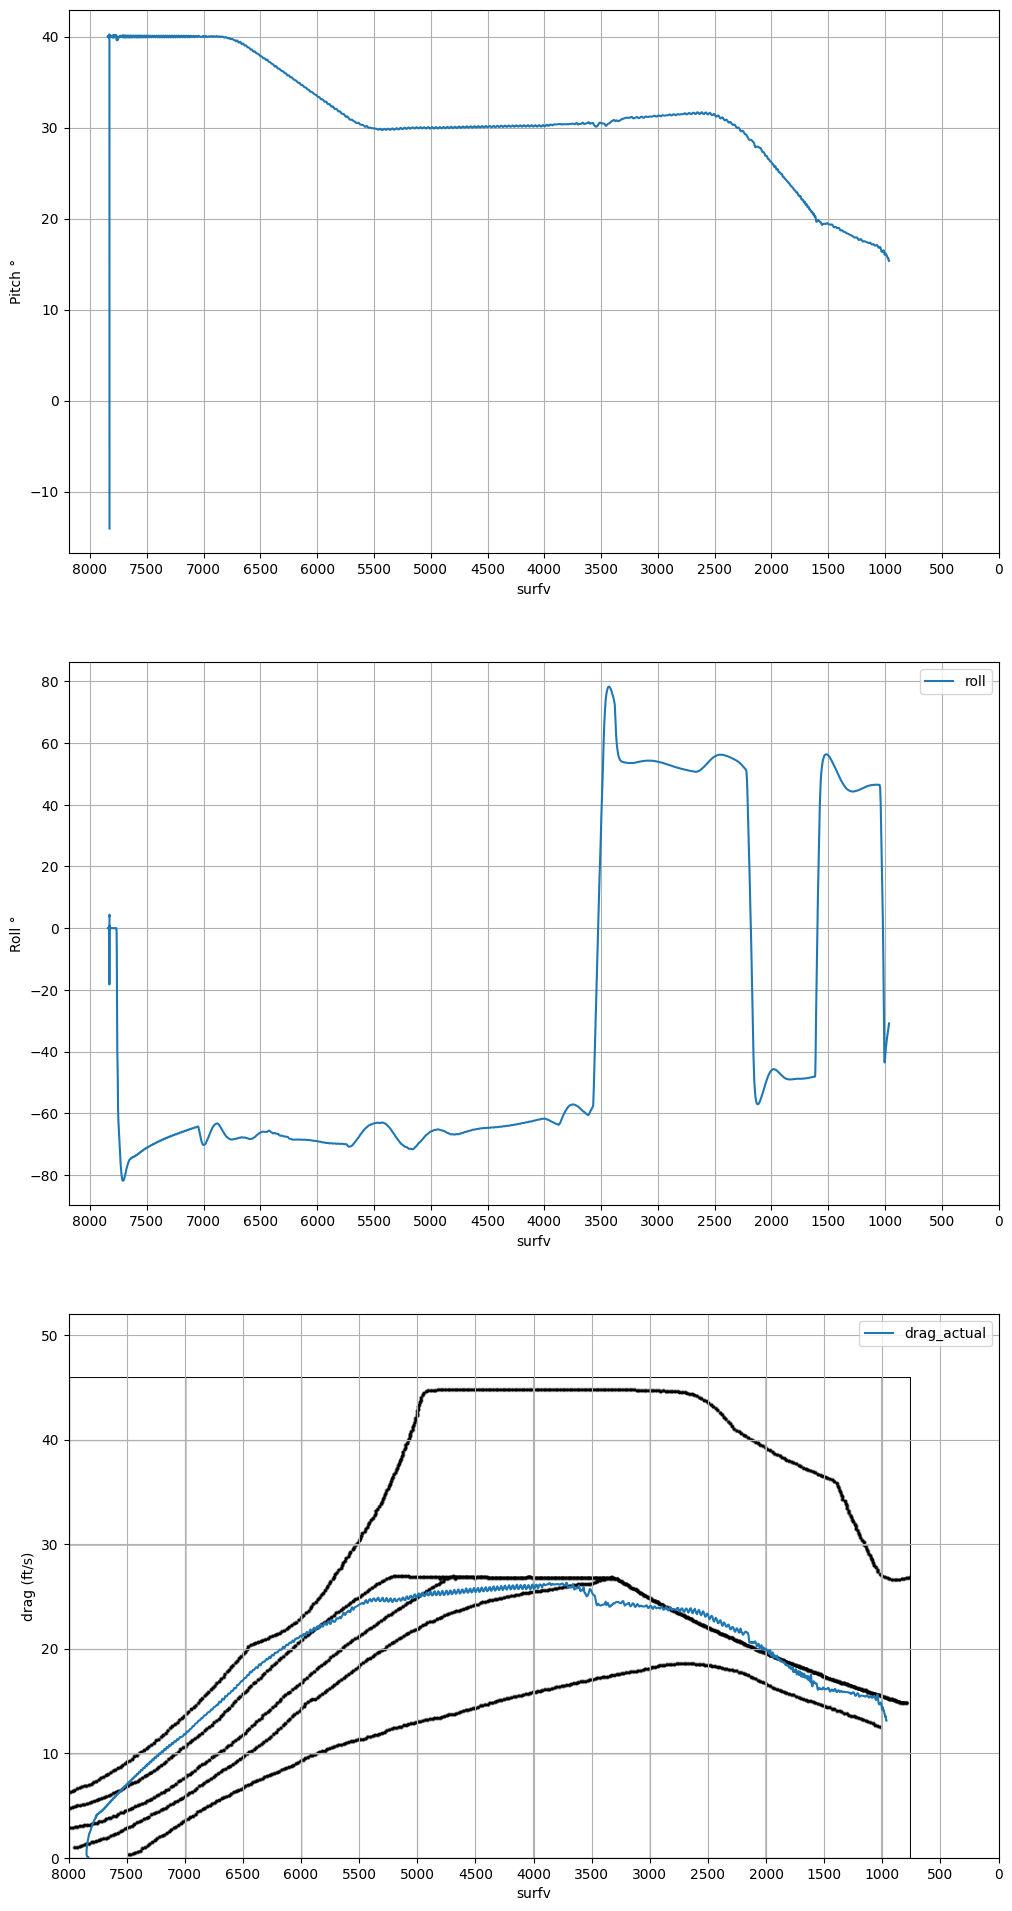

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8 * 3))

major_ticks = np.arange(0, 8500, 500)

plt_ = ax[0]
plt_.plot(entry_data['surfv'], entry_data['prog_pch'])
    
plt_.set_xlabel('surfv');
plt_.set_ylabel('Pitch °')

plt_.set_xticks(major_ticks);
plt_.grid();


plt_.invert_xaxis()

plt_ = ax[1]

plt1 = plt_.plot(entry_data['surfv'], entry_data['prog_roll'], label='roll');


    
plt_.set_xlabel('surfv')
plt_.set_ylabel('Roll °')
plt_.legend()

plt_.set_xticks(major_ticks);
plt_.grid();

plt_.invert_xaxis()


plt_ = ax[2]


img = plt.imread("ops3_drag.png")
plt_.imshow(img, aspect='auto', extent=[8000, 762, 0, 46], alpha=1 , cmap='Greys_r')

plt1 = plt_.plot(entry_data['surfv'], entry_data['drag'], label='drag_actual')
  
plt.ylim([0, 52])

plt_.set_xlabel('surfv')
plt_.set_ylabel('drag (ft/s)')
plt_.legend()
plt_.set_xticks(major_ticks)
plt_.grid()



Text(0, 0.5, 'EOW')

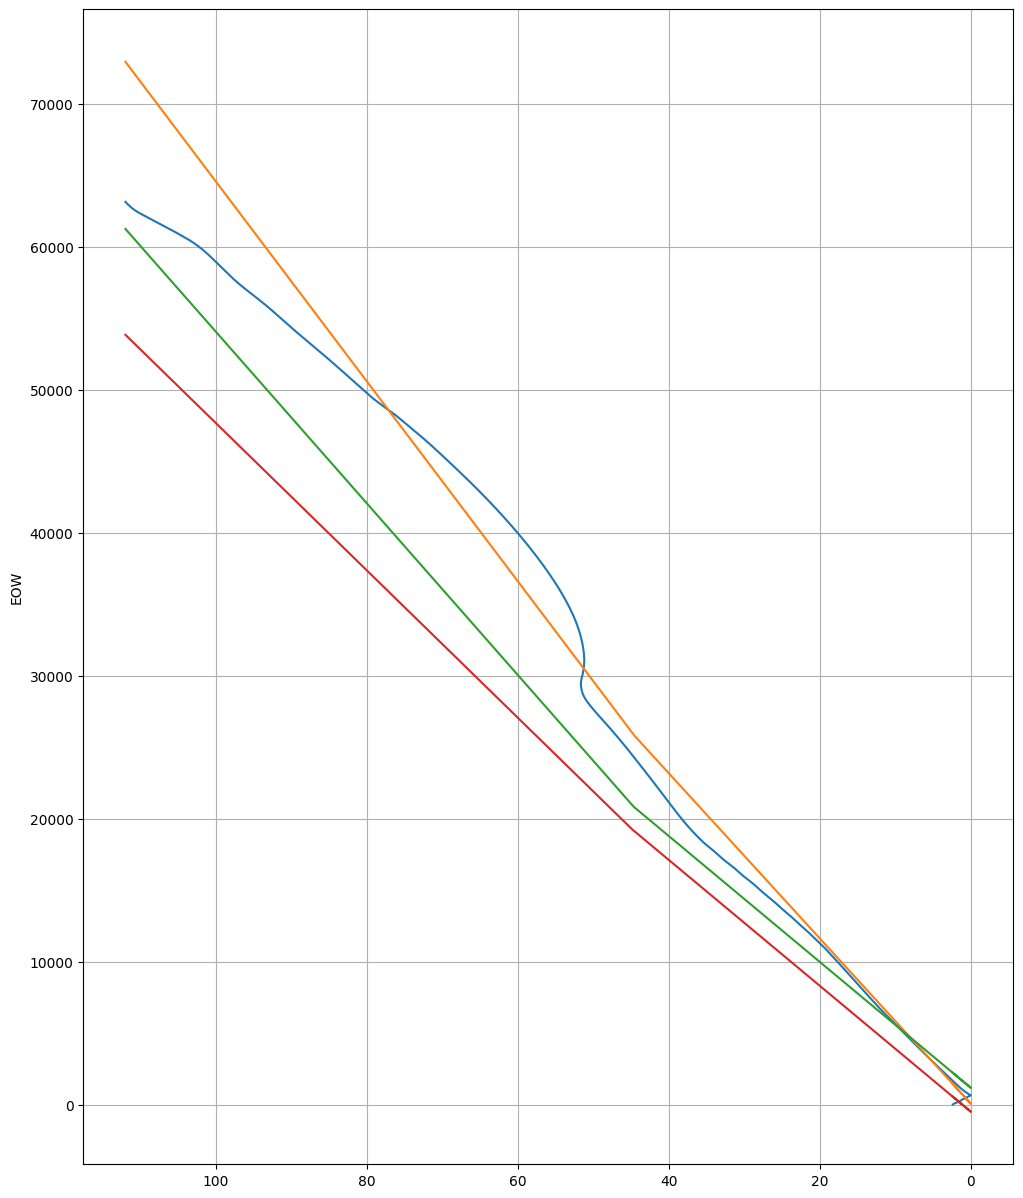

In [16]:
mt2ft = 3.28084

def emep2_(drpred):
    
    emep_c1 = [958, 10018]
    emep_c2 = [0.5155, 0.4404]
    
    eow_spt = [120000, -100000]
    
    iel = 0
    while (drpred <= eow_spt[iel]):
        iel += 1
    
    emep = emep_c1[iel] + drpred * emep_c2[iel] 
    
    return emep

def en2_(drpred):
    
    en_c1 = [-3712, 15500]
    en_c2 = [0.6005, 0.4404]

    eow_spt = [120000, -100000]
    
    iel = 0
    while (drpred <= eow_spt[iel]):
        iel += 1
    
    en = en_c1[iel] + drpred * en_c2[iel] 
    
    return en


def es2_(drpred):
    
    es_c1 = [911.6, 15500]
    es_c2 = [0.69946, 0.57789]

    eow_spt = [120000, -100000]

    iel = 0
    while (drpred <= eow_spt[iel]):
        iel += 1
    
    es = es_c1[iel] + drpred * es_c2[iel] 
    
    
    return es


ali_range = a_l_data.iloc[0]['range']

drpred = (taem_data['range'] - ali_range)*1000*mt2ft


en2 = [en2_(r)/mt2ft for r in drpred]
emep2 = [emep2_(r)/mt2ft for r in drpred]
es2 = [es2_(r)/mt2ft for r in drpred]




fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.set_ylabel('EOW')
plt_.grid()


plt_.invert_xaxis()


plt_.plot(taem_data['range'], taem_data['eow'])
plt_.plot(taem_data['range'], es2)
plt_.plot(taem_data['range'], en2)
plt_.plot(taem_data['range'], emep2)





Text(0, 0.5, 'A/L Altitude')

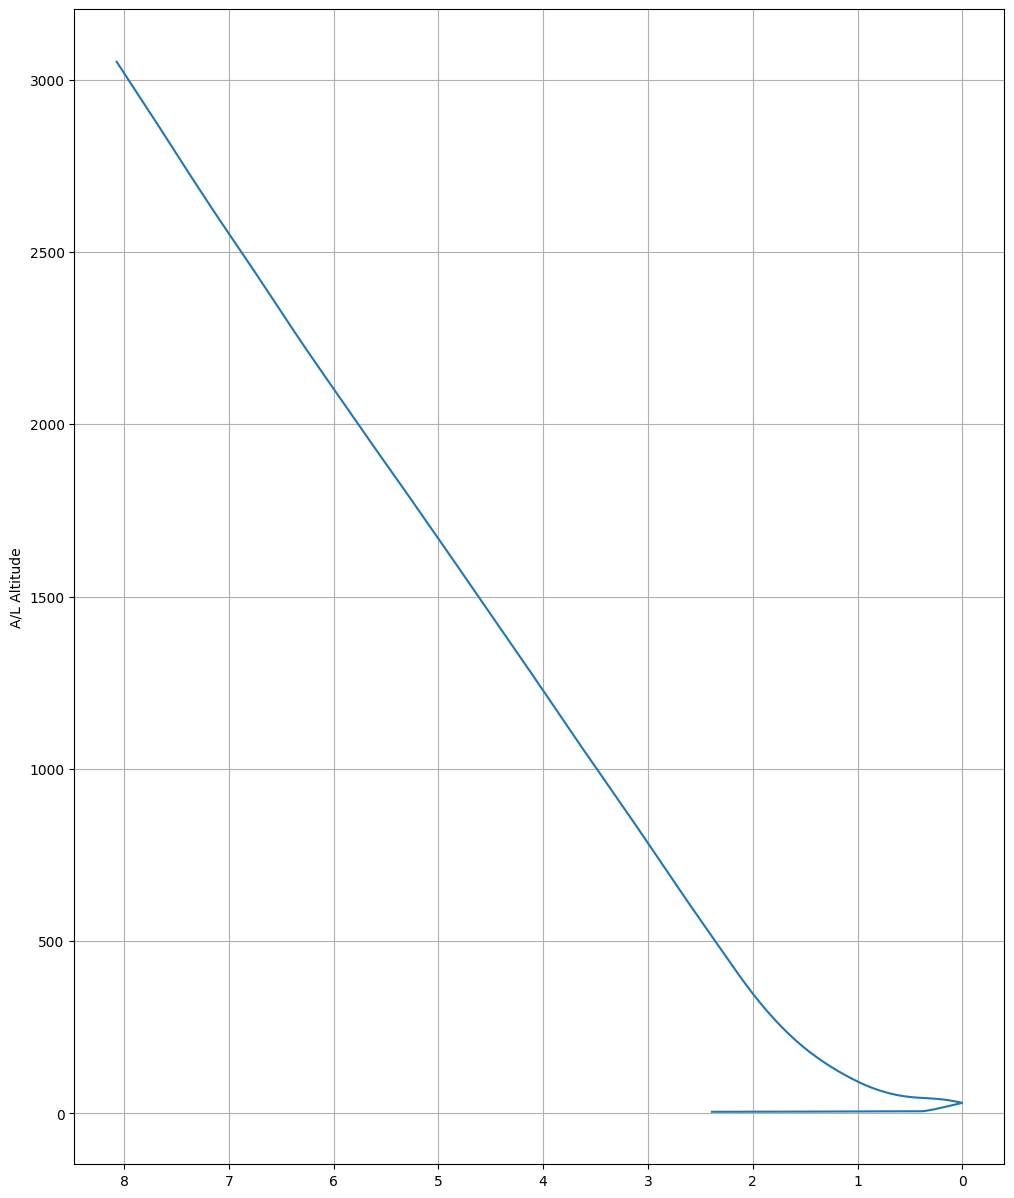

In [18]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.set_ylabel('A/L Altitude')
plt_.grid()

plt_.plot(a_l_data['range'], a_l_data['rwy_alt'])

plt_.invert_xaxis()